In [19]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
with open('data/train.pkl', 'rb') as abd:
    train_data = pickle.load(abd)

with open('data/test.pkl', 'rb') as abcd:
    test_data = pickle.load(abcd)
# table = pd.DataFrame(train_data)
# table.columns = ["x", "y"]
print(train_data)
# print(table)
np.random.shuffle(train_data)
# x=np.split(train_data,16)


[[  27.42765666 3335.78295109]
 [  -4.96183456 2647.40265244]
 [ -27.86119551  520.73369536]
 ...
 [  27.54602153 1729.42858449]
 [   8.97475985 1264.43870071]
 [ -19.66451461  -54.2662792 ]]


In [20]:
train_x=[]
train_y=[]
for i in train_data:

    train_x.append(i[0])
    train_y.append(i[1])
train_x=np.array(np.split(np.array(train_x),16))

train_x = [ [[j] for j in i] for i in train_x ]
train_y=np.array(np.split(np.array(train_y),16))
# train_y = [ [[j] for j in i] for i in train_y ]
test_x=[]
test_y=[]
for i in test_data:
    test_x.append(i[0])
    test_y.append(i[1])

test_x =[[i] for i in test_x]
# test_y=[[i] for i in test_y]


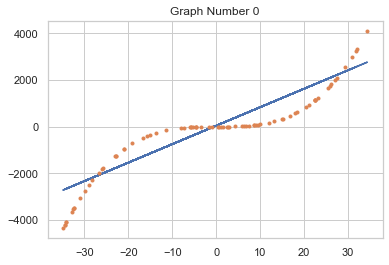

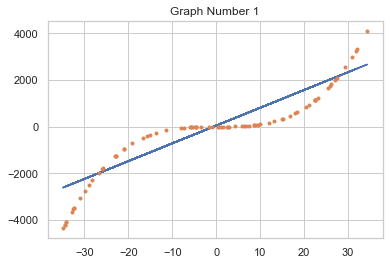

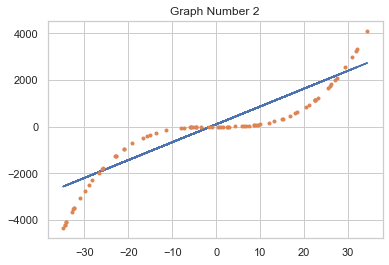

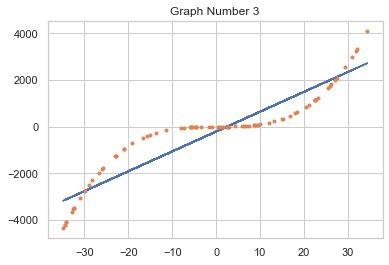

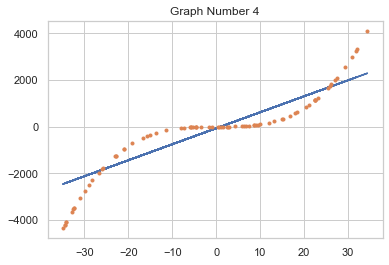

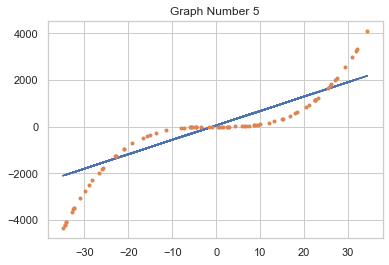

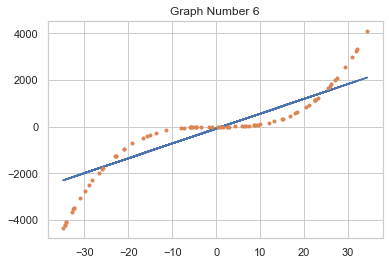

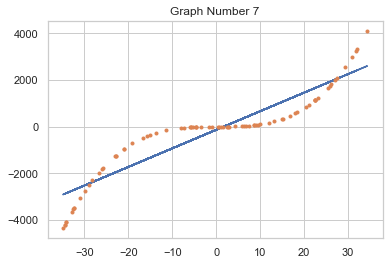

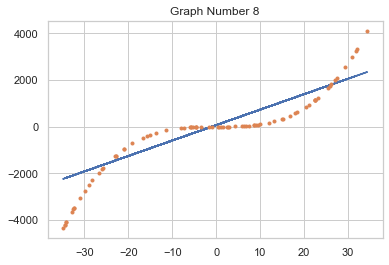

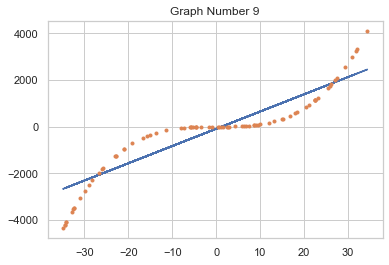

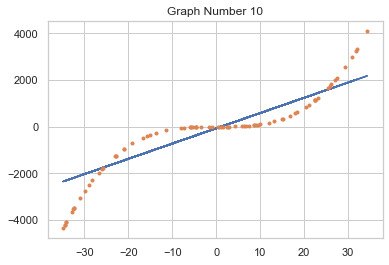

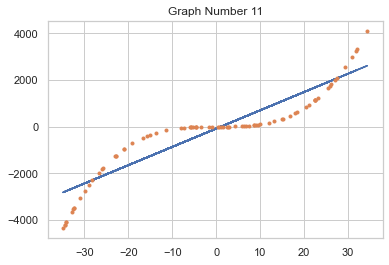

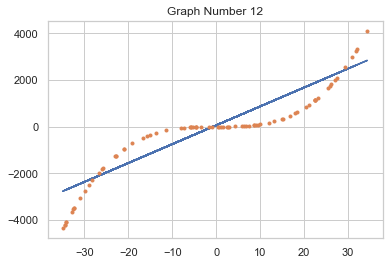

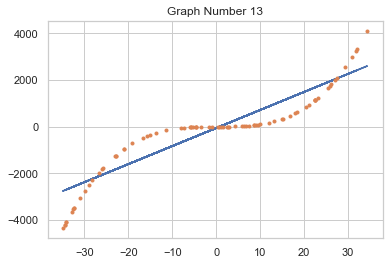

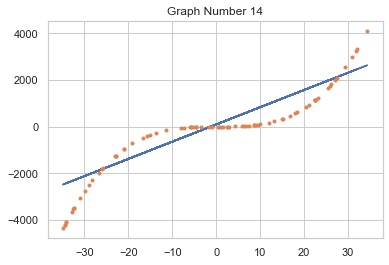

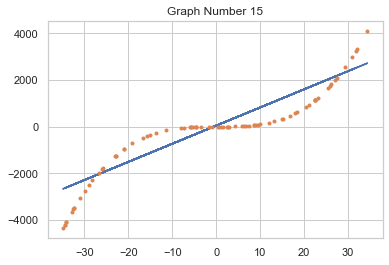

In [21]:
linearClassifier= [LinearRegression()]*16
prediction=[]
sns.set_theme(style="whitegrid")

for i in range(16):
    linearClassifier[i].fit(train_x[i],train_y[i])
    prediction.append(linearClassifier[i].predict(test_x))
    plt.plot(test_x,prediction[i])
    plt.plot(test_x,test_y,'.')
    plt.title('Graph Number '+str(i))
    plt.show()

Reference for fit_transform and transform= https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

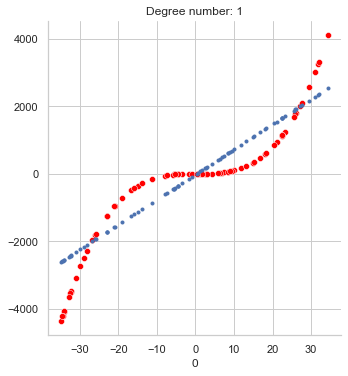

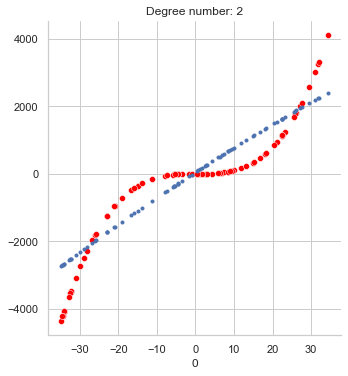

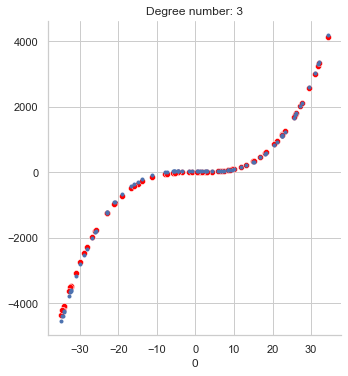

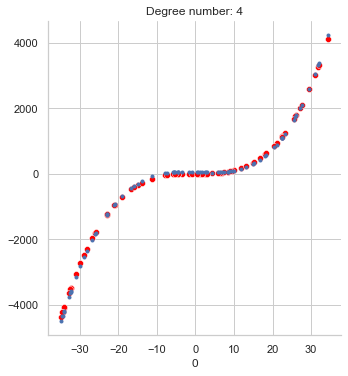

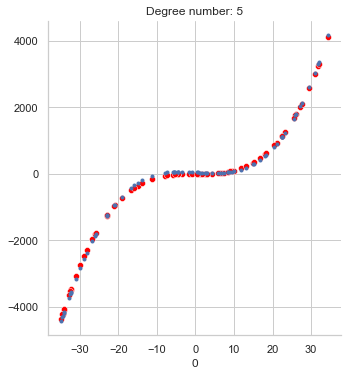

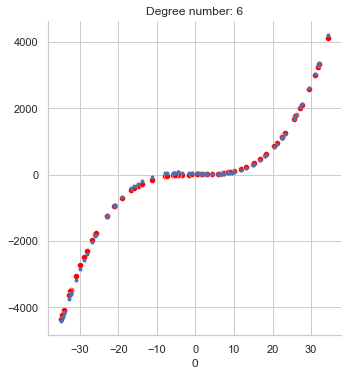

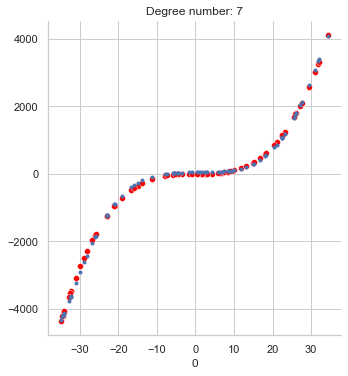

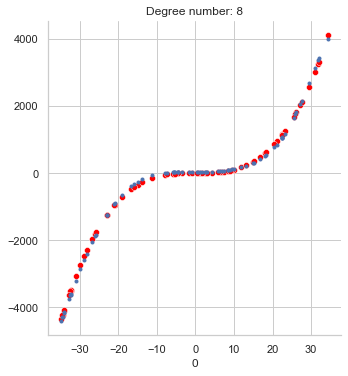

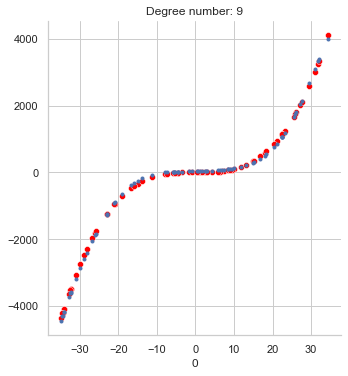

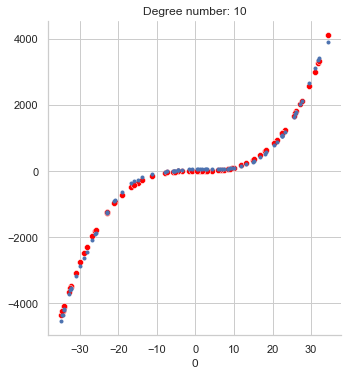

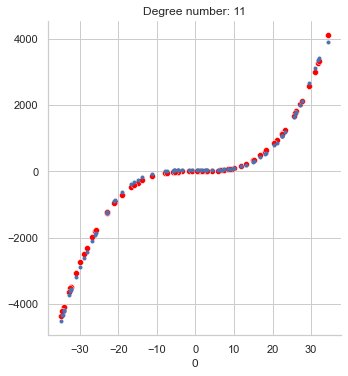

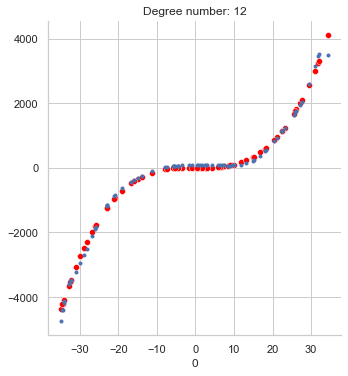

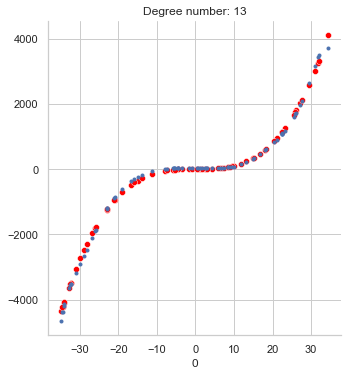

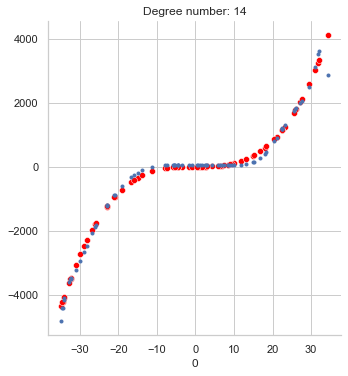

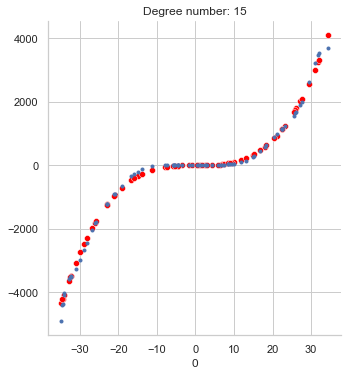

In [5]:
# Repeating the steps for all polynomials
predicted_y_vals=[]
predicted_means=[]
for i in range(1,16):
    single_deg_pred=[]
    for j in range(16):
        model=LinearRegression()
        poly=PolynomialFeatures(i)
        model.fit(poly.fit_transform(train_x[j]),train_y[j])
        single_deg_pred.append(model.predict(poly.transform(test_x)))
    predicted_y_vals.append(single_deg_pred)
    predicted_means.append(np.mean(single_deg_pred,axis=0))

df = pd.DataFrame(test_x)
for i in range(1,16):
    df[1] = prediction[i]
    sns.relplot(x=df[0],y=test_y,color='red')
    plt.plot(test_x,predicted_means[i-1],'.')
    plt.title("Degree number: "+str(i))

    plt.show()



In [17]:
def cal(a,b,var):
    for y in a:
        var.append(np.mean((y - b)**2))
    return np.mean(var)

def calc_var(y_vec, y_mean):
    var = []
    return cal(y_vec,y_mean,var)

In [18]:
bias_arr=[]
var_arr=[]
for i in range(1,16):
    bias_arr.append(np.mean(np.array(test_y-predicted_means[i-1])**2))
    var_arr.append(calc_var(predicted_y_vals[i-1],predicted_means[i-1]))
tabulate = pd.DataFrame(np.array([np.sqrt(bias_arr), var_arr]).T)
tabulate.columns = ['Bias', 'Variance']
tabulate.index = range(1, 16)
tabulate.round(3)


,Bias,Variance
1,700.883,26013.561
2,685.365,45009.767
3,63.728,52685.502
4,61.164,59365.229
5,54.068,80395.309
6,54.907,101118.036
7,64.799,113353.435
8,66.903,134085.196
9,67.205,154361.878
10,75.008,173050.446


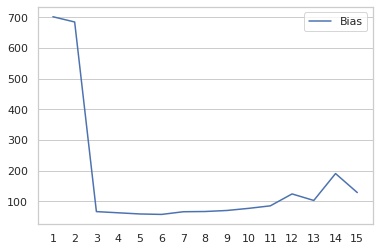

In [79]:
# Print Bias graph
plt.plot(np.array(np.sqrt(bias_arr)),label="Bias")
plt.xticks(np.arange(len(bias_arr)), np.arange(1, len(bias_arr)+1))
plt.grid(axis='x')
plt.legend()
plt.show()


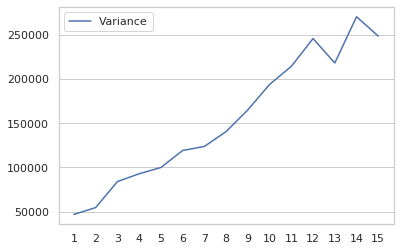

In [84]:
plt.plot(var_arr,label="Variance")
plt.xticks(np.arange(len(bias_arr)), np.arange(1, len(bias_arr)+1))
plt.grid(axis='x')
plt.legend()

plt.show()


## Calculate Irreducible Error
To do so we will first calculate the mean square error and then use the formula
Mean Square error= irreducible error + bias^2+ variance

In [85]:
mean_sq_error=[]
for i in range(1,16):
    mean_sq_error.append(np.mean((np.array(test_y)-np.array(predicted_y_vals[i-1]))**2))
# Now using the above formula we can calculate the irreducible error

irreducible_error=np.array(mean_sq_error)-(np.array(bias_arr)+np.array(var_arr))
table = pd.DataFrame(np.array(irreducible_error))
table.columns=["Irreducible error"]
table.index=range(1,16)
print(table)

    Irreducible error
1        0.000000e+00
2       -5.820766e-11
3        0.000000e+00
4        0.000000e+00
5        0.000000e+00
6       -1.455192e-11
7        0.000000e+00
8       -2.910383e-11
9       -2.910383e-11
10       2.910383e-11
11      -2.910383e-11
12       0.000000e+00
13      -5.820766e-11
14       5.820766e-11
15      -5.820766e-11


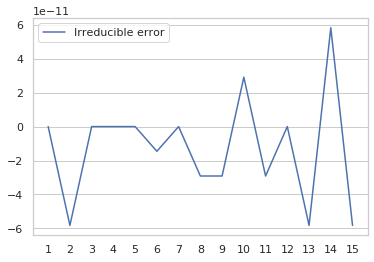

In [88]:
plt.plot(irreducible_error,label="Irreducible error")
plt.xticks(np.arange(len(irreducible_error)), np.arange(1, len(irreducible_error)+1))
plt.grid(axis='x')
plt.legend()

plt.show()


# Task 4
Plot the bias variance tradeoff graph
Based on above values, We now need to just print the bias^2,variance and error graphs

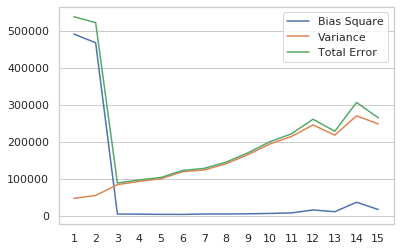

In [89]:
plt.plot(bias_arr,label="Bias Square")
plt.plot(var_arr,label="Variance")
plt.plot(mean_sq_error, label="Total Error")
plt.xticks(np.arange(len(bias_arr)), np.arange(1, len(bias_arr)+1))
plt.grid(axis='x')
plt.legend()
